# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [102]:
#1
data ='https://raw.githubusercontent.com/kenneithUC/week4-datamining/refs/heads/main/penguins_size.csv'

df= pd.read_csv(data)

df.sample(10)

#untuk mengambil data dari csv dan menampilkan 10 sample

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
249,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,MALE
212,Chinstrap,Dream,51.9,19.5,206.0,3950.0,MALE
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,MALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
291,Gentoo,Biscoe,46.4,15.6,221.0,5000.0,MALE
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
36,Adelie,Dream,38.8,20.0,190.0,3950.0,MALE
87,Adelie,Dream,36.9,18.6,189.0,3500.0,FEMALE
161,Chinstrap,Dream,51.3,19.9,198.0,3700.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [103]:
#2

df.info()

#untuk melihat info mengenai data yang dipakai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [104]:
#3
df.describe()

#untuk melihat detail data seperti mean,std,min,max.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [105]:
#4
col_name=['species','island','sex']

df['sex'] = df['sex'].replace('.', None)

for col in col_name:
  print(df[col].value_counts())

#untuk menampilkan unique value dari setiap column species,island dan sex dan di sex dikarenakan ada . dan Na

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
Name: count, dtype: int64


5. Null handling

In [106]:
#5
df.dropna(inplace=True)
df['sex'] = df['sex'].replace('.', None)
df['culmen_length_mm']=df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm']=df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].mean())
df['sex']=df['sex'].fillna(df['sex'].mode()[0])

df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

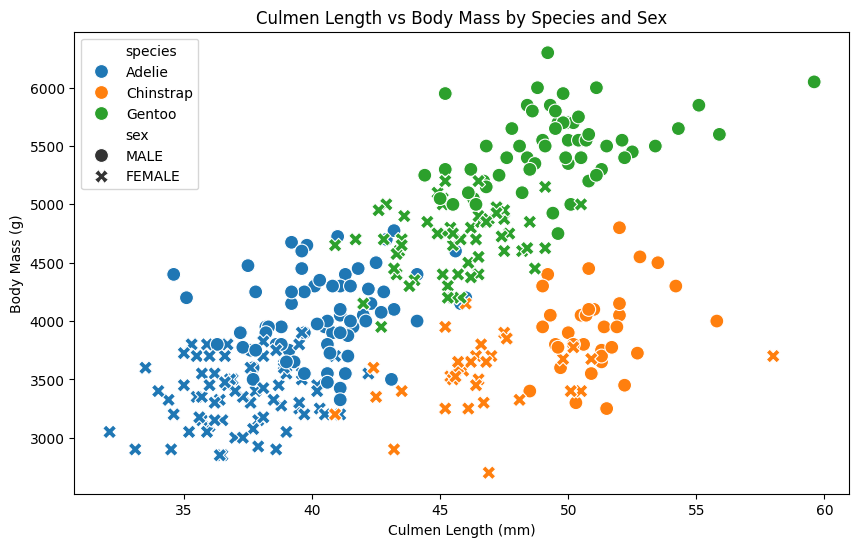

In [107]:
#6
plt.figure(figsize=(10, 6))
sns.scatterplot(x='culmen_length_mm', y='body_mass_g', hue='species', style='sex', data=df, s=100)

plt.title('Culmen Length vs Body Mass by Species and Sex')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')

plt.show()

#so this is the scatter plot to show the correlation of culmenlength to body mass for each species with their sex and it shows that gentoo has a relatively higher bodymass than all species.chinstrap have a relatively longer culmen length than adelie.

7. Check unique value of our target variable

In [108]:
#7
print(df['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [109]:
#8
label_encoder = LabelEncoder()
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,0,47.2,13.7,214.0,4925.0,0
340,Gentoo,0,46.8,14.3,215.0,4850.0,0
341,Gentoo,0,50.4,15.7,222.0,5750.0,1
342,Gentoo,0,45.2,14.8,212.0,5200.0,0


9. encode the target column and display the results

In [110]:
#9
label_encoder=LabelEncoder()
df['species']=label_encoder.fit_transform(df['species'])
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


10. create a heatmap to see the correlation and explain the conclusion

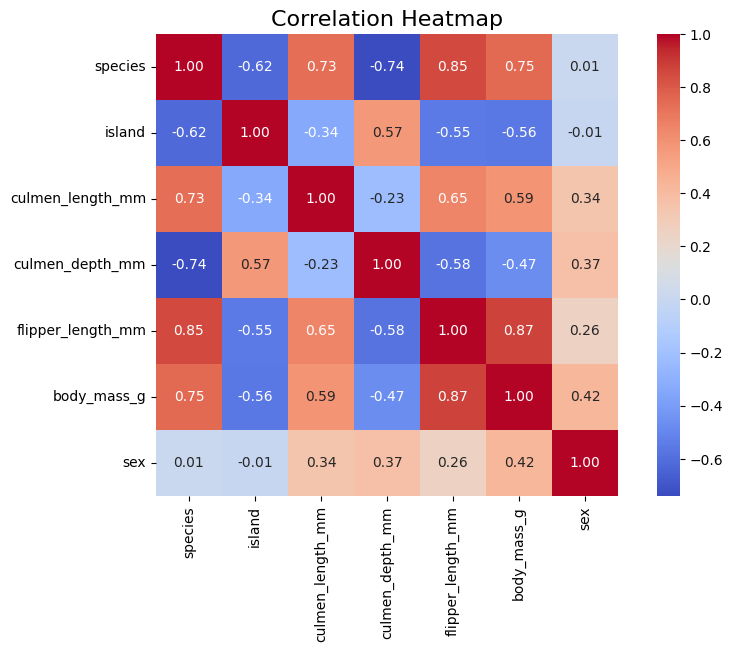

In [111]:
#10

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#The correlation Heatmap shows that the species have a positive correlation with culmen_length_nm,flipper_length_nm and body_mass_g.
#The species however have a negative correlation with culmen_dept_nm and island.
#Meanwhile the sex have a neutral correlation and so it will not be affected by any kind of species.


## Machine Learning

1. Splitting X and y

In [112]:
#1
X = df.drop(['species'], axis = 1)
y = df['species']

#Since X is the predicting variable and Y is the predicted variable

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [113]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Using train test split for data training and testing, with the test size of 20%

In [114]:
#3
X_train.shape, X_test.shape

# The shape method is used to check how many rows and columns are associated with each train or test data.

((266, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [115]:
#Criterion Entropy
#a
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [116]:
#b
y_pred_en = clf_en.predict(X_test)

# Predicting the X_test using Criterion Entropy.

In [117]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Showing the accuracy score based on the y_test and y_pred, and it results with a high 92 percent accuracy.

Model accuracy score with criterion entropy: 0.9701


In [118]:
#d
y_train_en = clf_en.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.9701
Training accuracy: 0.9624


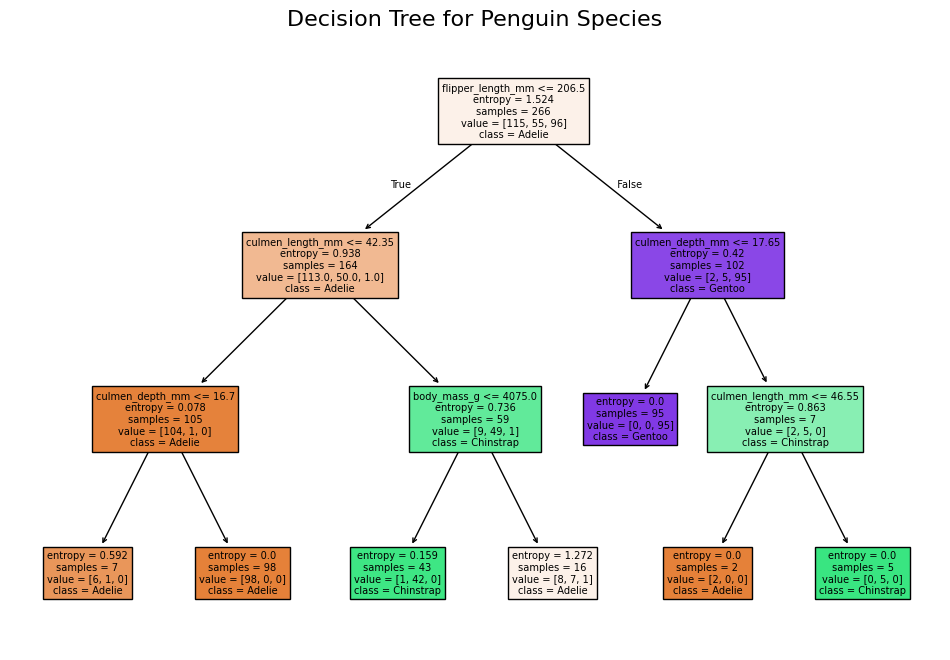

In [119]:
#e
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
plt.title('Decision Tree for Penguin Species', fontsize=16)
plt.show()

# Using matplotlib to create the decision tree of the Criterion Entropy algorithm.

2. Criterion Gini index

In [120]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [121]:
#b
y_pred_gini = clf_gini.predict(X_test)

# Predicting the X_test using Criterion Gini.

In [122]:
#c
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Showing the accuracy score based on the y_test and y_pred, and it results with a high 92 percent accuracy.

Model accuracy score with criterion gini: 0.9851


In [123]:
#d
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.9851
Training accuracy: 0.9737


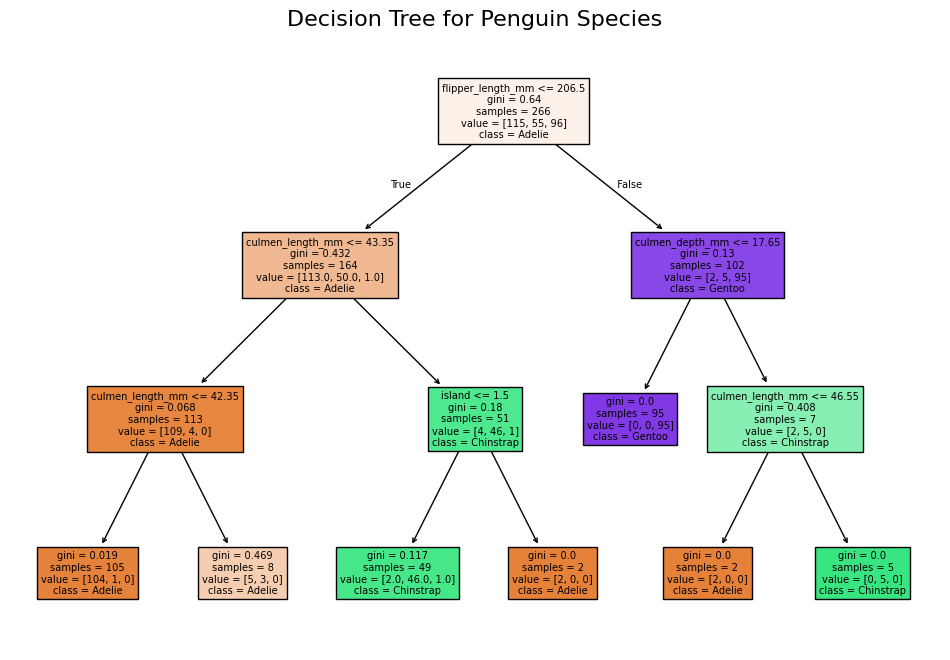

In [124]:
#e
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
plt.title('Decision Tree for Penguin Species', fontsize=16)
plt.show()


# Using matplotlib to create the decision tree of the Criterion Entropy algorithm.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [125]:
#f
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

# Printing the confusion matrix of both Criterion Entropy and Criterion Gini.

Confusion Matrix Entropy:
 [[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion Matrix Gini Index:
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [126]:
#g
class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", class_report_en)
print("Classification Report Gini Index: \n", class_report_gini)

# Printing the classification report both Criterion Entropy and Criterion Gini.

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [127]:
#h

# Results
# Both the Decision Tree models using Entropy and Gini Index as splitting criteria demonstrate strong performance in classifying penguin species, achieving an overall accuracy of 93%.
# The precision, recall, and F1-scores for each class are comparable across both models, indicating that both approaches effectively handle the dataset.
# Notably, class 2 (which is the Gentoo species) shows perfect precision and high recall, suggesting it is easily distinguishable from the others.
# However, while both models perform well, attention should be given to class 1, which exhibits a lower precision, indicating a higher chance of misclassification.

# Conclusion
# Performance Metrics: Both models produce identical precision, recall, and F1-scores across all classes, suggesting they have similar predictive capabilities.
# Model Preference: Given that the Entropy and Gini Index models yield the same performance metrics, the choice between them may depend on interpretability and computational efficiency.
# Gini Index is generally faster in computation compared to Entropy, making it preferable in scenarios where model training time is a consideration.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [128]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)

# Modelling using Naive Bayes Classifier.

GaussianNB()

In [129]:
#b
y_pred_nb = nb.predict(X_test)

# Predicting the X_test using the Naive Bayes Classifier model.

In [130]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb:.4f}")

#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix:\n", conf_matrix_nb)

# Printing both accuracy score and confusion matrix of the Naive Bayes Classifier model, showing a high 97% accuracy.


Model accuracy score: 1.0000
Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


In [131]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report_nb)

# Classification report of the Naive Bayes Classifier, showing the precision, recall, f1-score, and support values of the model.

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [132]:
#f
# Result
# The model exhibits exceptional performance in classifying penguin species, achieving an overall accuracy of 97%.
# It demonstrates high precision and recall across all classes, with a perfect recall of 1.00 for class 2, indicating effective identification of true instances.
# The consistently high F1-scores further confirm the model's reliability in minimizing misclassifications.

# Conclusion
# Overall, this model is excellent for practical applications in species identification and ecological studies.
# To ensure the model's ongoing effectiveness, it's crucial to perform regular cross-validation and monitor its performance with new data.
# Additionally, analyzing feature importance and exploring other algorithms could provide further insights and improvements.

KNN neighbours

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)

# Prediksi
y_pred = knn.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

Akurasi: 79.10%


Good Luck :)